In [1]:
import networkx as nx, matplotlib.pyplot as plt
import numpy as np, pandas as pd
import math

In [2]:
df = pd.read_csv('C:/Users/saich/OneDrive/Desktop/SNA/project/Data.csv')

In [3]:
GT = nx.Graph()
GT.add_nodes_from(df['character'].tolist(),bipartite=1,node_color='w',alpha=0.4,node_shape='d')

In [4]:
GT.add_nodes_from(df['title'].tolist(),bipartite=0,  node_color='red', alpha=0.4, node_shape='s')
for i in range(len(df.index)):
    GT.add_edge(df.at[i,'title'],df.at[i,'character'])

In [5]:
character_nodes = {n for n, d in GT.nodes(data=True) if d['bipartite'] == 1}
title_nodes = set(GT) - character_nodes

In [6]:
len(character_nodes) # number of characters

1860

In [7]:
len(title_nodes) # titles count

60

In [8]:
len(GT.edges)

2307

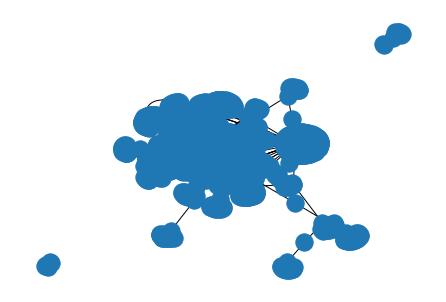

In [9]:
pos = nx.spring_layout(GT)
nx.draw(GT)

In [10]:
list(GT.neighbors('Tony Stark'))
#List of Marvel movies Tony Stark acted

['Iron Man',
 'Iron Man 2',
 'The Avengers',
 'Iron Man 3',
 'Avengers: Age of Ultron',
 'Captain America: Civil War',
 'Spider-Man: Homecoming',
 'Avengers: Infinity War',
 'Avengers: Endgame']

In [11]:
list(GT.neighbors('Avengers: Age of Ultron'))
#Main characters in the Avengers: Age of Ultron

['Tony Stark',
 'Thor',
 'Bruce Banner',
 'Steve Rogers',
 'Natasha Romanoff',
 'Clint Barton',
 'Ultron',
 'Nick Fury',
 'James Rhodes',
 'Pietro Maximoff',
 'Wanda Maximoff',
 'Jarvis',
 'Maria Hill',
 'Sam Wilson',
 'Peggy Carter',
 'Heimdall',
 'Laura Barton',
 'Erik Selvig',
 'Dr. Helen Cho',
 'Strucker',
 'Ulysses Klaue',
 'Madame B',
 'Stan Lee',
 'Dr. List',
 'Fortress Soldier',
 'Strucker Mercenary',
 'Zrinka',
 'Costel',
 'Sokovian Acid Student',
 'Cooper Barton',
 'Lila Barton',
 'Friday',
 'Nathaniel Pietro Barton']

In [12]:
# To find the Similarities between the nodes
def Jaccard_Cosine_Smlrty(G,l):
    num = list(set([n for n in G.neighbors(l[0])]) & set([m for m in G.neighbors(l[1])]))
    print('Common between the',l[0],'and', l[1],'are', num)
    denom_j = list(set([n for n in G.neighbors(l[0])] + [m for m in G.neighbors(l[1])]))
    print('Jaccard Similarity is ', len(num)/len(denom_j))
    denom_c = math.sqrt(len([n for n in G.neighbors(l[0])])*len([n for n in G.neighbors(l[1])]))
    print('Cosine Similarity is', len(num)/denom_c)

In [13]:
l = ['Tony Stark','Steve Rogers']
Jaccard_Cosine_Smlrty(GT,l)

Common between the Tony Stark and Steve Rogers are ['Avengers: Age of Ultron', 'Captain America: Civil War', 'Avengers: Endgame', 'The Avengers', 'Avengers: Infinity War']
Jaccard Similarity is  0.4166666666666667
Cosine Similarity is 0.5892556509887896


In [14]:
l2= ['Avengers: Age of Ultron', 'Avengers: Endgame']
Jaccard_Cosine_Smlrty(GT,l2)

Common between the Avengers: Age of Ultron and Avengers: Endgame are ['Steve Rogers', 'Wanda Maximoff', 'Jarvis', 'Laura Barton', 'Lila Barton', 'Natasha Romanoff', 'James Rhodes', 'Clint Barton', 'Bruce Banner', 'Tony Stark', 'Nick Fury', 'Cooper Barton', 'Maria Hill', 'Thor', 'Friday', 'Peggy Carter', 'Sam Wilson']
Jaccard Similarity is  0.21794871794871795
Cosine Similarity is 0.3758340350425746


Isolated Components

In [15]:
# isolated components
i= nx.number_connected_components(GT)
i

3

In [16]:
[GT.subgraph(c).copy() for c in nx.connected_components(GT)]

In [17]:
#Isolated component
nx.node_connected_component(GT,'Werewolf by Night')

{'Azarel',
 'Barasso',
 'Billy Swan',
 'Elsa Bloodstone',
 'Jack Russell',
 'Jovan',
 'Liorn',
 'Ted (The Man-Thing)',
 'The Flaming Tuba',
 'Ulysses Bloodstone',
 'Verussa',
 'Werewolf by Night'}

In [18]:
nx.node_connected_component(GT,"Marvel One-Shot: Item 47")

{'Agent Blake',
 'Agent Jasper Sitwell',
 'Bennie Pollock',
 'Claire Weiss',
 'Marvel One-Shot: Item 47'}

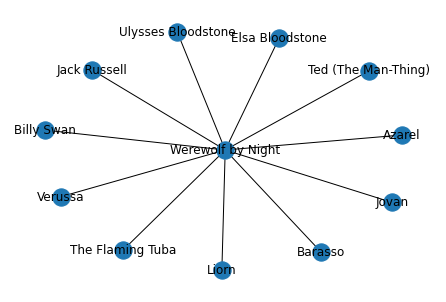

In [19]:
#Isolated Network of Werewolf team 
G_Werewolf = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Werewolf by Night'):
        G_Werewolf.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_Werewolf,with_labels=True, font_color='black')

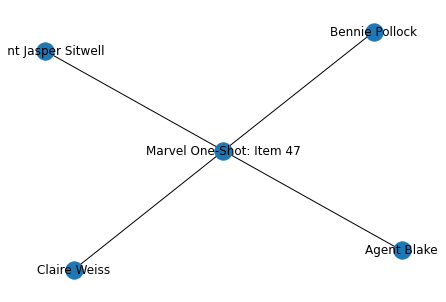

In [20]:
G_Oneshot = nx.Graph()
for i in range(len(df.index)):
    if (df.at[i,'title'] == 'Marvel One-Shot: Item 47'):
        G_Oneshot.add_edge(df.at[i,'title'],df.at[i,'character'])
nx.draw(G_Oneshot,with_labels=True, font_color='black')

In [21]:
def deg_dst(G7): # degree distribution of titles and characters
    degrees = [G7.degree(n) for n in title_nodes]
    deg,freq = np.unique(degrees,return_counts=True)
    plt.plot(deg,freq,label = 'title degree distribution')
    plt.legend()
    plt.show()
    degrees1 = [G7.degree(n) for n in character_nodes]
    deg1,freq1 = np.unique(degrees1,return_counts=True)
    plt.plot(deg1,freq1,label = 'characters degree distribution')
    plt.legend()
    plt.show()
def avg_deg_cc(G): # average degree and clustering co-efficient
    avg_cc_G = nx.transitivity(G)
    avg_deg_G = G.degree()
    deg_sum_G =0
    for j in list(avg_deg_G):
        deg_sum_G += j[1]
    avg_deg_G =  deg_sum_G/len(G.nodes())
    return (avg_deg_G, avg_cc_G)

In [22]:
avg_deg_, avg_clstrng_ = avg_deg_cc(GT) 
#print('Average degree of Network', avg_deg_,'clustering co-efficient', avg_clstrng_)

In [23]:
num = 0 
for c in nx.connected_components(GT):
    num += nx.average_shortest_path_length(GT.subgraph(c))*len(GT.subgraph(c))

In [24]:
GT_avg_path = num/len(GT.nodes())

In [25]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)

MU Network 
 
Average degree 2.403125
Average path 4.81965255871013
Average clusteirng 0.0009916895257868273


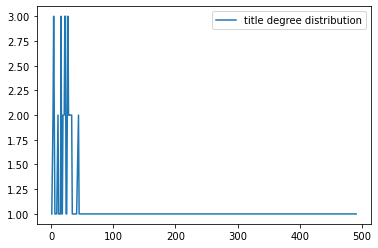

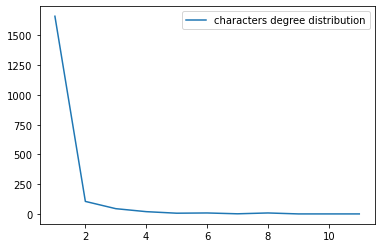

In [26]:
deg_dst(GT)

In [27]:
#des = [GT.degree(n) for n in title_nodes]
titles_dict ={}
characters_dict={}
for n in title_nodes: 
    titles_dict.update({n:GT.degree(n)})
for n in character_nodes:
    characters_dict.update({n:GT.degree(n)})  
#list(des)

In [28]:
#Degrees of Titles and characters
print('Chracters degree',characters_dict)
print('\n titles degree',titles_dict)

Chracters degree {'Nazi General': 1, 'Elliot': 1, 'Qasim Zaghlul': 1, 'Wendy Ross-Hogarth': 1, 'Detective Blake': 1, 'Aiko': 1, 'Yat-Sen': 1, 'Alex Wesley': 1, 'Hydra Buyer': 1, 'Ryhno': 1, 'Marc Spector': 1, 'Miles Van Ert': 1, 'Police Officer #1': 1, 'Hela': 1, 'Norma': 1, 'Sheldon McFee': 1, 'Baron Mordo': 1, 'Luca Russo': 1, 'Dorothy': 1, 'Dr. Seth Honicky': 1, 'Gilgamesh': 1, 'Eva Belyakov': 1, 'Dr. Gregory Tepper': 1, 'D.K.': 1, 'Joe the Orderly': 1, 'Agent Lumley': 1, 'SAC Tammy Hattley': 1, 'Santino': 1, 'Bryce': 1, 'Cousin Ched': 1, 'Agent Stoltz': 1, 'Goon One': 1, 'Armand VII': 1, "N'Jobu": 1, 'Sana': 1, 'Sissy Garcia': 1, 'Olga Pachinko': 1, 'Gina': 1, 'Ariann': 1, 'Dr. List': 2, 'Agent Cale': 1, 'Cassie': 1, 'The Seamstress': 1, 'Lucas': 1, 'Jack Russell': 1, 'Manny': 1, 'Eiffel': 1, 'Silke': 1, 'Darren Cross': 2, 'Agent Nathanson': 1, 'Jackson Norris': 1, 'French Pirate #2': 1, 'On-Set Rocket': 2, 'Lincoln Campbell': 1, 'Harold Simcoe': 1, 'Randy': 1, 'Matt Murdock': 3, '

### Random Simlated graph

In [29]:
GT_p = avg_deg_ /(len(GT.nodes())-1) # caliculating probability
GT_nodes=len(GT.nodes())
print('Random model probability value',GT_p, 'and length of nodes', GT_nodes)

Random model probability value 0.0012522798332464827 and length of nodes 1920


In [30]:
GT_sim_rndm = nx.gnp_random_graph(GT_nodes, GT_p)

In [31]:
# Simulated Random 
avg_deg_sim, avg_clstrng_sim =  avg_deg_cc(GT_sim_rndm)

In [32]:
avg_clstrng_sim

0.0005388898868331237

Isoloated graphs in network

In [33]:
i= nx.number_connected_components(GT_sim_rndm)
i

198

In [34]:
num = 0 
for c in nx.connected_components(GT_sim_rndm):
    num += nx.average_shortest_path_length(GT_sim_rndm.subgraph(c))*len(GT_sim_rndm.subgraph(c))
GT_sim_avg_path = num/len(GT_sim_rndm.nodes())

In [35]:
print("Random Simulated MU Network \n ")
print("Average degree" ,avg_deg_sim)
print("Average path", GT_sim_avg_path)
print("Average clusteirng", avg_clstrng_sim)


Random Simulated MU Network 
 
Average degree 2.415625
Average path 7.265663591681485
Average clusteirng 0.0005388898868331237


MU Network 
 
Average degree 2.403125
Average path 4.81965255871013
Average clusteirng 0.0009916895257868273

Average path is 1.55 times the average path of Random Model Graph 
CLustering co-efficient is 2.37 times the CLustering co-efficient of Random graph

### Small World

In [36]:
#Lattice Grah generation
def lattice_graph(G,avg_deg):
    GLat_3 = nx.Graph()
    GLat_3sh = []
    nodes_count = len(G)#len(G.nodes())
    for i in (range(nodes_count)): 
      GLat_3.add_node(i)
      GLat_3sh.append(i)
    new_connections = round(avg_deg/2)
    for i in GLat_3sh:
        nbhr = []
        j=i+1
        for k in range(new_connections):
            if j in GLat_3.nodes():
                nbhr.append(j)
            else:
                j = j - len(GLat_3.nodes)
                nbhr.append(j)
            j+=1 
        for j in nbhr:
            if (GLat_3.has_edge(i,j)==False): 
                GLat_3.add_edge(i,j)  
    return GLat_3

In [37]:
# MU lattice
Lat_MU = lattice_graph(GT,avg_deg_)
print(len(Lat_MU.edges()))

1920


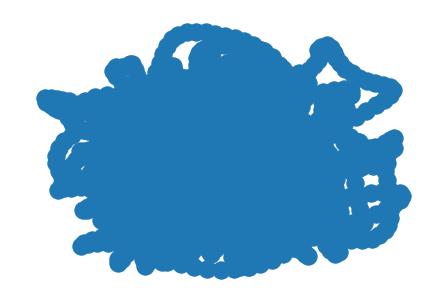

In [38]:
nx.draw(Lat_MU)

In [39]:
avg_clstrng_Lat_MU = nx.transitivity(Lat_MU)
print("lattice clustering", avg_clstrng_Lat_MU)

if (avg_clstrng_Lat_MU != 0) : 
    BT = 1-((avg_clstrng_/avg_clstrng_Lat_MU) ** (1./3.))
    print("Number of nodes", len(GT.nodes), "\n mean degree",avg_deg_,"\n parameter",BT)
else: print('As lattice clustering co-efficient is 0, cannot proceed with Small World Model')


lattice clustering 0
As lattice clustering co-efficient is 0, cannot proceed with Small World Model


### Preferential Algorithm

#### Connecting 'Marvel One-Shot: Item 47' and 'Werewolf by Night' clusters' actors (nodes) to the base cluster based on the Preferential Algorithm Method 
#### Comparing the clustering co-efficient, average path and degree distribution of new network with the actual MU network 

In [40]:
new_nodes = list(GT.neighbors('Werewolf by Night'))
new_nodes2= list(GT.neighbors('Marvel One-Shot: Item 47'))
for i in new_nodes2: new_nodes.append(i)
new_nodes # Nodes (actors) adding to the base cluster

['Jack Russell',
 'Elsa Bloodstone',
 'Verussa',
 'Jovan',
 'Azarel',
 'Liorn',
 'Barasso',
 'Billy Swan',
 'Ted (The Man-Thing)',
 'The Flaming Tuba',
 'Ulysses Bloodstone',
 'Claire Weiss',
 'Bennie Pollock',
 'Agent Jasper Sitwell',
 'Agent Blake']

In [41]:
# Removing 'Marvel One-Shot: Item 47' and 'Werewolf by Night' clusters from the main graph
print("Node count in actual MU network",len(GT.nodes()))
print("Removing the nodes included to 'Marvel One-Shot: Item 47' and 'Werewolf by Night",len(new_nodes))
for i in new_nodes: GT.remove_node(i)
GT.remove_node('Marvel One-Shot: Item 47')
GT.remove_node('Werewolf by Night')
print("Node count after removing 'Marvel One-Shot: Item 47' and 'Werewolf by Night' nodes from the MU network",len(GT.nodes()))

Node count in actual MU network 1920
Removing the nodes included to 'Marvel One-Shot: Item 47' and 'Werewolf by Night 15
Node count after removing 'Marvel One-Shot: Item 47' and 'Werewolf by Night' nodes from the MU network 1903


In [42]:
print("MU Network \n ")
print("Average degree" ,avg_deg_ )
print("Average path",GT_avg_path)
print("Average clusteirng", avg_clstrng_)

MU Network 
 
Average degree 2.403125
Average path 4.81965255871013
Average clusteirng 0.0009916895257868273


In [43]:
def PAM(G,avg_deg,new_nodes):
    node_count=len(G.nodes())
    G_PAM = nx.Graph
    G_PAM = G.copy()
    i = node_count-1
    G_node_list = np.array((G.nodes()))
    #node probability
    node_prob =[]
    for n in G.nodes():
        prob = G.degree(n)/(2*len(G.edges()))
        node_prob.append(prob)
#node_prob
    
    for n in range(len(new_nodes)):
        i = np.random.choice(new_nodes)
        G_PAM.add_node(i)
        while (G_PAM.degree(i)!=round(avg_deg)):
            j=np.random.choice(G_node_list, p= node_prob)
            print(i,j,G_PAM.degree(i))
            G_PAM.add_edge(i,j)
        new_nodes.remove(i) 
        
    return G_PAM    

In [44]:
PAM_MU = PAM(GT,avg_deg_,new_nodes)

Claire Weiss Dave 0
Claire Weiss Peter Quill 1
Agent Jasper Sitwell Agent McCafferty 0
Agent Jasper Sitwell Young Sana 1
Ulysses Bloodstone Secret Invasion 0
Ulysses Bloodstone Guardians of the Galaxy Vol. 2 1
Billy Swan Eric Fraser 0
Billy Swan Emma 1
Jovan What If...? 0
Jovan Agents of S.H.I.E.L.D. 1
Barasso Victoria 0
Barasso Agents of S.H.I.E.L.D. 1
Azarel Agents of S.H.I.E.L.D. 0
Azarel Thor 1
Liorn Flint 0
Liorn Luke Cage 1
Agent Blake Shang-Chi and the Legend of the Ten Rings 0
Agent Blake Cindy 1
Bennie Pollock Ms. Marvel 0
Bennie Pollock Captain Marvel 1
Jack Russell JARVIS 0
Jack Russell Arturo 'El Rey' Gomez III 1
Elsa Bloodstone Captain William Dole 0
Elsa Bloodstone The Punisher 1
Ted (The Man-Thing) What If...? 0
Ted (The Man-Thing) Kate 1
The Flaming Tuba Qasim Zaghlul 0
The Flaming Tuba Agents of S.H.I.E.L.D. 1
Verussa Ms. Marvel 0
Verussa Agents of S.H.I.E.L.D. 1


In [45]:
# PAM - MU avg deg n clustering 
avg_deg_PAM, avg_clstrng_PAM = avg_deg_cc(PAM_MU)

In [46]:
# PAM - MU Graph avg path
PAM_avg_path= nx.average_shortest_path_length(PAM_MU)

In [47]:
print("PAM-MU Graph \n ")
print("Average degree" ,avg_deg_PAM )
print("Average path", PAM_avg_path)
print("Average clusteirng", avg_clstrng_PAM)

PAM-MU Graph 
 
Average degree 2.421272158498436
Average path 4.835020395419285
Average clusteirng 0.0009919843106849253


MU Network 
 
Average degree 2.403125
Average path 4.81965255871013
Average clusteirng 0.0009916895257868273

In [49]:
print(len(PAM_MU))

1918
